In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from scipy import stats
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
data = pd.read_csv('train.csv')
val = pd.read_csv('test.csv')

In [3]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
label = data['label']

In [5]:
data.drop(columns=['label'], inplace=True)

In [6]:
train, test, y_train, y_test = train_test_split(data, label, train_size=0.8, random_state=42)

In [7]:
train.shape

(33600, 784)

In [8]:
test.shape

(8400, 784)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [10]:
def fit_method(clf, params, data, labels, test, y_test):
    CV = GridSearchCV(clf, param_grid=params, n_jobs=-1, cv=3)
    CV.fit(data, labels)
    print(f'Best score: {CV.best_score_}')
    print(f'Test score: {CV.score(test, y_test)}')
    print(f'Best params: {CV.best_params_}')
    return CV

In [44]:
params = {
        'penalty': ['l2'],
        'solver': ['lbfgs'],
        'C': [0.1, 1, 2]
    }

log_reg_CV = fit_method(LogisticRegression(multi_class='multinomial'), params, train[:5000], y_train[:5000], test, y_test)

Best score: 0.8696
Test score: 0.8691666666666666
Best params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


C:\Users\iLeks\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [45]:
params = {
    'kernel': ['poly', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_CV = fit_method(SVC(), params, train[:5000], y_train[:5000], test, y_test)

Best score: 0.9406
Test score: 0.9515476190476191
Best params: {'gamma': 'scale', 'kernel': 'rbf'}


In [46]:
params = {
    'n_estimators': [1,5,10,50,100,200,500],
    'max_depth': [2, 5, None]
}

rfc_CV = fit_method(RandomForestClassifier(), params, train[:5000], y_train[:5000], test, y_test)

Best score: 0.9354
Test score: 0.9415476190476191
Best params: {'max_depth': None, 'n_estimators': 500}


In [47]:
params = {
    'n_estimators': [1,5,10,50,100,200],
}

ab_CV = fit_method(AdaBoostClassifier(), params, train[:5000], y_train[:5000], test, y_test)

Best score: 0.574
Test score: 0.7022619047619048
Best params: {'n_estimators': 50}


In [48]:
params = {
    'n_neighbors': [1,5,10,50,100,200],
    'leaf_size': [5, 30, 100],
    'p': [1, 2]
}

knn_CV = fit_method(KNeighborsClassifier(), params, train[:5000], y_train[:5000], test, y_test)

Best score: 0.9244
Test score: 0.934404761904762
Best params: {'leaf_size': 5, 'n_neighbors': 1, 'p': 2}


Упростим датасет заменив все значения >0 единицами. Запустим модели с лучшими параметрами.

In [49]:
train_simple = train.copy()
train_simple[train_simple>0] = 1

test_simple = test.copy()
test_simple[test_simple>0] = 1

In [51]:
log_reg_simple = LogisticRegression(**log_reg_CV.best_params_)
log_reg_simple.fit(train_simple[:5000], y_train[:5000])
log_reg_simple.score(test_simple, y_test)

C:\Users\iLeks\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8941666666666667

In [52]:
rfc_simple = RandomForestClassifier(**rfc_CV.best_params_)
rfc_simple.fit(train_simple[:5000], y_train[:5000])
rfc_simple.score(test_simple, y_test)

0.9465476190476191

In [53]:
svm_simple = SVC(**svm_CV.best_params_)
svm_simple.fit(train_simple[:5000], y_train[:5000])
svm_simple.score(test_simple, y_test)

0.9488095238095238

# PCA

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler().fit(train)
train_scaled = sc.transform(train)
test_scaled = sc.transform(test)

In [13]:
pca = PCA().fit(train_scaled)
train_pca = pca.transform(train_scaled)
test_pca = pca.transform(test_scaled)

Text(0, 0.5, 'Variance')

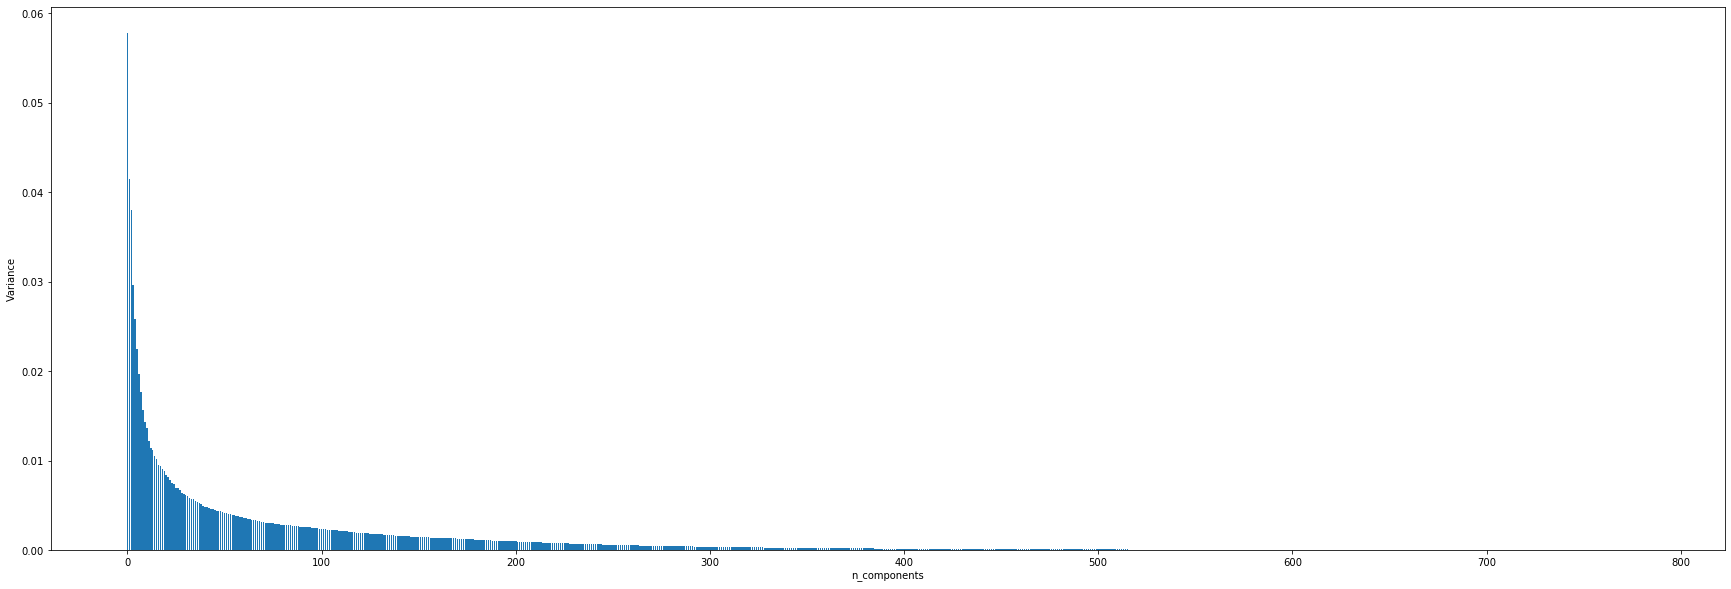

In [12]:
var_per = pca.explained_variance_ratio_

plt.figure(figsize=(30,10))
ind = np.arange(len(var_per)) 
plt.bar(ind,var_per)
plt.xlabel('n_components')
plt.ylabel('Variance')

In [13]:
n_comp = np.sum(pca.explained_variance_ratio_.cumsum()<=0.9)

In [14]:
pca = PCA(n_components=n_comp).fit(train_scaled)
train_pca = pca.transform(train_scaled)
test_pca = pca.transform(test_scaled)

print(train_pca.shape)

(33600, 222)


In [72]:
params = {
    'kernel': ['poly', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'C': [1000, 100, 10, 1]
}
svm_CV = fit_method(SVC(), params, train_pca[:5000], y_train[:5000], test_pca, y_test)

Best score: 0.9366
Test score: 0.9497619047619048
Best params: {'C': 1000, 'gamma': 'scale', 'kernel': 'poly'}


In [73]:
params = {
    'n_neighbors': [1, 5, 10],
    'leaf_size': [5, 30]
}

knn_CV = fit_method(KNeighborsClassifier(), params, train_pca[:5000], y_train[:5000], test_pca, y_test)

Best score: 0.8964
Test score: 0.9069047619047619
Best params: {'leaf_size': 5, 'n_neighbors': 5}


In [74]:
params = {
        'penalty': ['l2'],
        'solver': ['lbfgs'],
        'C': [0.1, 1, 2]
    }

log_reg_CV = fit_method(LogisticRegression(multi_class='multinomial'), params, train_pca[:5000], y_train[:5000], test_pca, y_test)

Best score: 0.8874
Test score: 0.8996428571428572
Best params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


C:\Users\iLeks\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [18]:
pca = PCA().fit(train_scaled)
train_pca = pca.transform(train_scaled)
test_pca = pca.transform(test_scaled)
n_comp = np.sum(pca.explained_variance_ratio_.cumsum()<=0.75)

In [20]:
pca = PCA(n_components=n_comp).fit(train_scaled)
train_pca = pca.transform(train_scaled)
test_pca = pca.transform(test_scaled)

print(train_pca.shape)

(33600, 112)


In [21]:
params = {
    'kernel': ['poly', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'C': [1000, 100, 10, 1]
}
svm_CV = fit_method(SVC(), params, train_pca[:5000], y_train[:5000], test_pca, y_test)

Best score: 0.9374
Test score: 0.9471428571428572
Best params: {'C': 1000, 'gamma': 0.001, 'kernel': 'poly'}


In [27]:
params = {
    'n_neighbors': [1, 5, 10],
    'leaf_size': [1, 5, 30]
}

knn_CV = fit_method(KNeighborsClassifier(), params, train_pca[:5000], y_train[:5000], test_pca, y_test)

Best score: 0.9118
Test score: 0.9226190476190477
Best params: {'leaf_size': 5, 'n_neighbors': 5}


In [28]:
params = {
        'penalty': ['l2'],
        'solver': ['lbfgs'],
        'C': [0.1, 1, 2]
    }

log_reg_CV = fit_method(LogisticRegression(multi_class='multinomial'), params, train_pca[:5000], y_train[:5000], test_pca, y_test)

Best score: 0.8894
Test score: 0.8909523809523809
Best params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


C:\Users\iLeks\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Еще уменьшим размерность пространства.

In [14]:
pca = PCA(n_components=50).fit(train_scaled)
train_pca = pca.transform(train_scaled)
test_pca = pca.transform(test_scaled)

print(train_pca.shape)

(33600, 50)


In [15]:
params = {
    'kernel': ['poly', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'C': [1000, 100, 10, 1]
}
svm_CV = fit_method(SVC(), params, train_pca[:5000], y_train[:5000], test_pca, y_test)

Best score: 0.942
Test score: 0.9467857142857142
Best params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [16]:
params = {
    'n_neighbors': [1, 5, 10],
    'leaf_size': [5, 30]
}

knn_CV = fit_method(KNeighborsClassifier(n_jobs=-1), params, train_pca[:5000], y_train[:5000], test_pca, y_test)

Best score: 0.9112
Test score: 0.9232142857142858
Best params: {'leaf_size': 5, 'n_neighbors': 5}


In [17]:
params = {
        'penalty': ['l2'],
        'solver': ['lbfgs'],
        'C': [0.1, 1, 2]
    }

log_reg_CV = fit_method(LogisticRegression(multi_class='multinomial', n_jobs=-1), params, train_pca[:5000], y_train[:5000], test_pca, y_test)

Best score: 0.8894
Test score: 0.8926190476190476
Best params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [18]:
params = {
    'n_estimators': [1,5,10,50,100,200,500],
    'max_depth': [2, 5, None]
}

rfc_CV = fit_method(RandomForestClassifier(n_jobs=-1), params, train_pca[:5000], y_train[:5000], test_pca, y_test)

Best score: 0.9076
Test score: 0.9145238095238095
Best params: {'max_depth': None, 'n_estimators': 500}


In [19]:
svm = SVC(**svm_CV.best_params_, probability=True)
svm.fit(train_pca[:], y_train[:])
svm.score(test_pca, y_test)

0.9732142857142857

In [20]:
knn = KNeighborsClassifier(**knn_CV.best_params_)
knn.fit(train_pca[:], y_train[:])
knn.score(test_pca, y_test)

0.9530952380952381

In [21]:
log_reg = LogisticRegression(**log_reg_CV.best_params_)
log_reg.fit(train_pca[:], y_train[:])
log_reg.score(test_pca, y_test)

C:\Users\iLeks\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\iLeks\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8886904761904761

In [22]:
rfc = RandomForestClassifier(**rfc_CV.best_params_)
rfc.fit(train_pca[:], y_train[:])
rfc.score(test_pca, y_test)

0.9463095238095238

In [23]:
from sklearn.ensemble import VotingClassifier

In [26]:
voter = VotingClassifier(estimators=[('svm', svm), ('knn', knn), ('rfc', rfc)], voting='soft')

In [27]:
voter.fit(train_pca[:], y_train[:])

VotingClassifier(estimators=[('svm',
                              SVC(C=10, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_function_shape='ovr',
                                  degree=3, gamma='scale', kernel='rbf',
                                  max_iter=-1, probability=True,
                                  random_state=None, shrinking=True, tol=0.001,
                                  verbose=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=5,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n...
                                                     class_weight=None,
                                                     criterion='gini',
                   

In [28]:
voter.score(test_pca, y_test)

0.9705952380952381

Make submission

In [29]:
data = pd.read_csv('train.csv')
val = pd.read_csv('test.csv')

label = data['label']
data.drop(columns=['label'], inplace=True)

In [30]:
sc = StandardScaler().fit(data)
data_scaled = sc.transform(data)
val_scaled = sc.transform(val)

pca = PCA(n_components=50).fit(data_scaled)

data_pca = pca.transform(data_scaled)
val_pca = pca.transform(val_scaled)

In [31]:
svm = SVC(**svm_CV.best_params_, probability=True)
svm.fit(data_pca, label)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [32]:
prediction = svm.predict(val_pca)

In [33]:
prediction

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [40]:
sub = pd.DataFrame()
sub['ImageId'] = np.arange(1, 28001)
sub['Label'] = prediction
sub.to_csv('submission.csv',index=False)